In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
galex = pd.read_csv('../../hsc-diffuse-galaxies/paper/table-1-data/tab-1-galex.csv')
sam = pd.read_csv('../../hsc-diffuse-galaxies/data/final-sample/hsc-lsbg-final-cat.csv')

In [40]:
sam['id'] = ['LSBG-'+str(i) for i in sam['cat-id']]

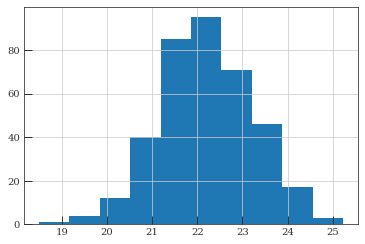

In [5]:
galex.nuv.hist();

In [43]:
galex.set_index('id', inplace=True)
sam.set_index('id', inplace=True)

In [44]:
sources = galex.join(sam, how='left', lsuffix='_galex')

In [117]:
sources['mu_nuv'] = sources.nuv + 2.5*np.log10(2*np.pi*sources.r_e**2)


In [187]:
mu_max = 26.75
r_e_min = 5
cut = (sources['mu_nuv']<mu_max) & (sources['r_e']>r_e_min)



In [35]:
import hdgal

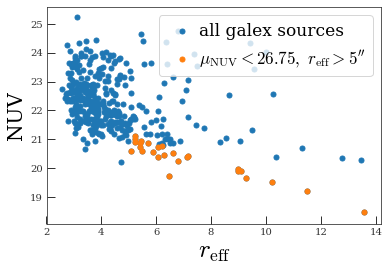

In [189]:
plt.scatter(sources['r_e'], sources['nuv'], label='all galex sources')
plt.scatter(sources.loc[cut, 'r_e'], 
            sources.loc[cut, 'nuv'], 
            label=r'$\mu_\mathrm{NUV}<'+str(mu_max)+',\ r_\mathrm{eff}>'+str(r_e_min)+'^{\prime\prime}$')
plt.xlabel(r'$r_\mathrm{eff}$', fontsize=25)
plt.ylabel('NUV', fontsize=20)
legend = plt.legend(fontsize=17, frameon=True, labelspacing=0.5, handletextpad=0.0)
legend.get_frame().set_facecolor('w');

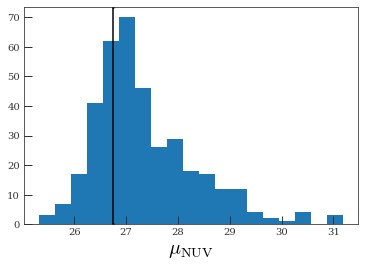

In [194]:
plt.hist(sources.mu_nuv, bins='auto')
plt.xlabel(r'$\mu_\mathrm{NUV}$', fontsize=20)
plt.axvline(x=mu_max);

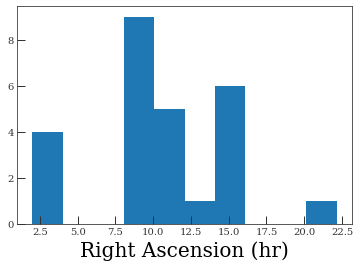

In [191]:
plt.hist(sources.loc[cut, 'ra']/15)
plt.xlabel('Right Ascension (hr)', fontsize=20);

In [193]:
hdgal.nbtools.display_group(sources.loc[cut, 'viz-id'], size=150, 
                            image_dir='../../udg-zoo/io/images/')

In [129]:
sources.loc['LSBG-750', ['r_e', 'mu_0_forced_g', 'nuv']]

r_e              8.97832
mu_0_forced_g    24.2623
nuv                19.98
Name: LSBG-750, dtype: object

In [130]:
19.98 + 2.5*np.log10(2*np.pi*8.97832**2)

26.741425071944978